In [1]:
using DataFrames, CSV, Statistics
using Plots

ENV["COLUMNS"]=200

200

In [2]:
df = DataFrame(CSV.File("strandedness_summary.csv"))
first(df, 5)

,READ_PAIR_OK,TOTAL_READ_PAIRS,DROPPED_PAIR_STRANDS_MISMATCH,StrandTest_frFirstStrand,StrandTest_frSecondStrand,StrandTest_ambig_genesFountOnBothStrands,StrandTest_ambig_noGenes,StrandTest_ambig_other
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,50794,52211,0,30269,9734,2072,8716,3
2,36275,37316,0,21755,6862,1702,5950,6
3,41920,43299,0,24923,8593,1910,6487,7
4,45742,47146,0,24415,10685,2096,8539,7
5,47830,49232,0,30072,8138,2224,7394,2


In [3]:
#ncol(df)
names(df)

11-element Vector{String}:
 "READ_PAIR_OK"
 "TOTAL_READ_PAIRS"
 "DROPPED_PAIR_STRANDS_MISMATCH"
 "StrandTest_frFirstStrand"
 "StrandTest_frSecondStrand"
 "StrandTest_ambig_genesFountOnBothStrands"
 "StrandTest_ambig_noGenes"
 "StrandTest_ambig_other"
 "iLab_ID"
 "Project"
 "Sample"

In [4]:
#The definations extracted from QoRTs output
println("READ_PAIR_OK -- Number of reads or read-pairs that pass initial filters and are processed by QoRTs.
TOTAL_READ_PAIRS -- Total number of reads or read-pairs found in the input file.    
DROPPED_PAIR_STRANDS_MISMATCH -- Number of read-pairs dropped because the paired reads align to inconsistent strands
StrandTest_frFirstStrand -- Number of reads or read-pairs that match the fr_FirstStrand strandedness rule
StrandTest_frSecondStrand -- Number of reads or read-pairs that match the fr_secondstrand strandedness rule
StrandTest_ambig_genesFountOnBothStrands -- Number of reads or read-pairs where the strandedness is ambiguous due to there being genes on both strands
StrandTest_ambig_noGenes -- Number of reads or read-pairs where the strandedness is ambiguous due to there being no known genes.
StrandTest_ambig_other -- Numebr of reads or read-pairs where the strandedness is ambiguous due to other reasons")

READ_PAIR_OK -- Number of reads or read-pairs that pass initial filters and are processed by QoRTs.
TOTAL_READ_PAIRS -- Total number of reads or read-pairs found in the input file.    
DROPPED_PAIR_STRANDS_MISMATCH -- Number of read-pairs dropped because the paired reads align to inconsistent strands
StrandTest_frFirstStrand -- Number of reads or read-pairs that match the fr_FirstStrand strandedness rule
StrandTest_frSecondStrand -- Number of reads or read-pairs that match the fr_secondstrand strandedness rule
StrandTest_ambig_genesFountOnBothStrands -- Number of reads or read-pairs where the strandedness is ambiguous due to there being genes on both strands
StrandTest_ambig_noGenes -- Number of reads or read-pairs where the strandedness is ambiguous due to there being no known genes.
StrandTest_ambig_other -- Numebr of reads or read-pairs where the strandedness is ambiguous due to other reasons


# % of total reads match the strandedness rule

In [5]:
#Number of reads that match the strandedness rule and % to total reads
df2 = df[!, [9, 10, 11, 2, 4, 5]]
df2[!, "StrandTest_frFirstStrand(%)"] = round.(df[!, 4] ./ df[!, 2] * 100, digits = 2)
df2[!, "StrandTest_frSecondStrand(%)"] = round.(df[!, 5] ./ df[!, 2] * 100, digits = 2)
first(df2, 5)

,iLab_ID,Project,Sample,TOTAL_READ_PAIRS,StrandTest_frFirstStrand,StrandTest_frSecondStrand,StrandTest_frFirstStrand(%),StrandTest_frSecondStrand(%)
,String,String,String,Int64,Int64,Int64,Float64,Float64
1,S134-GWA-AB-253,L134A,CR31_S31,52211,30269,9734,57.97,18.64
2,S134-GWA-AB-253,L134A,CR32_S32,37316,21755,6862,58.3,18.39
3,S134-GWA-AB-253,L134A,CR33_S33,43299,24923,8593,57.56,19.85
4,S134-GWA-AB-253,L134A,CR34_S34,47146,24415,10685,51.79,22.66
5,S134-GWA-AB-253,L134A,CR35_S35,49232,30072,8138,61.08,16.53


In [6]:
#group rows by iLab_ID and Project
gdf2 = groupby(df2, [:iLab_ID, :Project]);

In [7]:
# #sort the last group
# x = sort(gdf2[end], "StrandTest_frFirstStrand");
# first(x, 5)

In [8]:
#descriptive statistics of the last group
#describe(gdf2[end][!, 4:end], :min, :max, :mean, :median, std => :std)

In [9]:
combine(gdf2,
    "StrandTest_frFirstStrand(%)" => mean => :First_mean,
    "StrandTest_frFirstStrand(%)" => median => :First_median,
    "StrandTest_frFirstStrand(%)" => (x -> [extrema(x)]) => [:First_min, :First_max],
    "StrandTest_frFirstStrand(%)" => std => :First_std,
    
    "StrandTest_frSecondStrand(%)" => mean => :Second_mean,
    "StrandTest_frSecondStrand(%)" => median => :Second_median,
    "StrandTest_frSecondStrand(%)" => (x -> [extrema(x)]) => [:Second_min, :Second_max],
    "StrandTest_frSecondStrand(%)" => std => :Second_std
)

,iLab_ID,Project,First_mean,First_median,First_min,First_max,First_std,Second_mean,Second_median,Second_min,Second_max,Second_std
,String,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,S134-GWA-AB-253,L134A,62.411,63.34,50.7,71.39,5.22969,12.8977,11.175,6.51,22.66,4.64013
2,S134-GWA-AB-253,L134B,73.9453,74.035,68.25,78.06,2.13866,1.11133,1.02,0.83,1.82,0.272229
3,S134-GWA-AB-253,L134D,74.618,74.5,73.26,76.25,1.06152,1.231,1.175,0.97,1.73,0.26168
4,S134-GWA-AB-253,L134E,60.4177,59.84,53.43,68.83,3.9685,13.4097,14.005,4.77,21.52,3.74994
5,S147-GWA-AB-253,L134D,74.232,74.695,71.38,77.24,1.77006,1.058,1.04,0.82,1.55,0.163662
6,S147-GWA-AB-253,L134C,74.6537,74.44,71.39,78.51,1.90234,1.054,1.045,0.83,1.26,0.114066
7,S147-GWA-KF-404,L142,84.2138,83.955,82.79,85.44,0.7579,0.664375,0.635,0.52,0.95,0.131705
8,S190-GWA-SW-584,L179,89.0203,88.965,88.72,89.63,0.22363,0.450667,0.45,0.4,0.52,0.0341329
9,S195-GWA-DS-433,L173A,60.492,61.14,51.05,65.9,3.79583,9.2565,7.78,6.27,15.73,2.91869


Note: S224-GWA-JP-670 has very low percentage of totals reads assigned to either strand!

# % of the reads match the strandedness rule

In [10]:
df3 = df[!, [9, 10, 11, 4, 5]]
df3[!, "StrandTest_frFirstStrand(%)"] = round.(df[!, 4] ./ (df[!, 4] + df[!, 5]) * 100, digits = 2)
df3[!, "StrandTest_frSecondStrand(%)"] = round.(df[!, 5] ./ (df[!, 4] + df[!, 5]) * 100, digits = 2)
first(df3, 5)

,iLab_ID,Project,Sample,StrandTest_frFirstStrand,StrandTest_frSecondStrand,StrandTest_frFirstStrand(%),StrandTest_frSecondStrand(%)
,String,String,String,Int64,Int64,Float64,Float64
1,S134-GWA-AB-253,L134A,CR31_S31,30269,9734,75.67,24.33
2,S134-GWA-AB-253,L134A,CR32_S32,21755,6862,76.02,23.98
3,S134-GWA-AB-253,L134A,CR33_S33,24923,8593,74.36,25.64
4,S134-GWA-AB-253,L134A,CR34_S34,24415,10685,69.56,30.44
5,S134-GWA-AB-253,L134A,CR35_S35,30072,8138,78.7,21.3


In [11]:
gdf3 = groupby(df3, [:iLab_ID, :Project]);

In [12]:
dfc = combine(gdf3,
    "StrandTest_frFirstStrand(%)" => mean => :First_mean,
    "StrandTest_frFirstStrand(%)" => median => :First_median,
    "StrandTest_frFirstStrand(%)" => (x -> [extrema(x)]) => [:First_min, :First_max],
    "StrandTest_frFirstStrand(%)" => std => :First_std,
    
    "StrandTest_frSecondStrand(%)" => mean => :Second_mean,
    "StrandTest_frSecondStrand(%)" => median => :Second_median,
    "StrandTest_frSecondStrand(%)" => (x -> [extrema(x)]) => [:Second_min, :Second_max],
    "StrandTest_frSecondStrand(%)" => std => :Second_std
)

## add Thawn
dfc[!, "ThawN"] = [1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 4, 2, 1, 3, 3, 1, 5, 2, 3];
dfc

,iLab_ID,Project,First_mean,First_median,First_min,First_max,First_std,Second_mean,Second_median,Second_min,Second_max,Second_std,ThawN
,String,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,S134-GWA-AB-253,L134A,82.9287,83.865,69.56,91.18,5.91008,17.0713,16.135,8.82,30.44,5.91008,1
2,S134-GWA-AB-253,L134B,98.5173,98.655,97.61,98.95,0.362652,1.48267,1.345,1.05,2.39,0.362652,2
3,S134-GWA-AB-253,L134D,98.372,98.455,97.7,98.72,0.355084,1.628,1.545,1.28,2.3,0.355084,1
4,S134-GWA-AB-253,L134E,81.8527,80.905,72.49,93.51,4.95864,18.1473,19.095,6.49,27.51,4.95864,2
5,S147-GWA-AB-253,L134D,98.5955,98.605,97.99,98.93,0.208969,1.4045,1.395,1.07,2.01,0.208969,1
6,S147-GWA-AB-253,L134C,98.6067,98.605,98.29,98.92,0.163567,1.39333,1.395,1.08,1.71,0.163567,3
7,S147-GWA-KF-404,L142,99.2181,99.26,98.88,99.4,0.157659,0.781875,0.74,0.6,1.12,0.157659,3
8,S190-GWA-SW-584,L179,99.497,99.495,99.42,99.55,0.0367799,0.503,0.505,0.45,0.58,0.0367799,2
9,S195-GWA-DS-433,L173A,86.7125,88.645,77.6,91.08,4.22766,13.2875,11.355,8.92,22.4,4.22766,1


In [13]:
xnames = string.(dfc[!, 1], "_", dfc[!, 2])

19-element Vector{String}:
 "S134-GWA-AB-253_L134A"
 "S134-GWA-AB-253_L134B"
 "S134-GWA-AB-253_L134D"
 "S134-GWA-AB-253_L134E"
 "S147-GWA-AB-253_L134D"
 "S147-GWA-AB-253_L134C"
 "S147-GWA-KF-404_L142"
 "S190-GWA-SW-584_L179"
 "S195-GWA-DS-433_L173A"
 "S195-GWA-DS-433_L173B"
 "S195-GWA-DS-433_L173C"
 "S205-GWA-EI-597_L196"
 "S207-GWA-DS-433_L190A"
 "S207-GWA-DS-433_L190B"
 "S217_GWA-KH-650_L199"
 "S224-GWA-JP-670_L223A"
 "S224-GWA-JP-670_L223B"
 "S240_GWA-LMVPS-705_L230A"
 "S240_GWA-LMVPS-705_L230B"

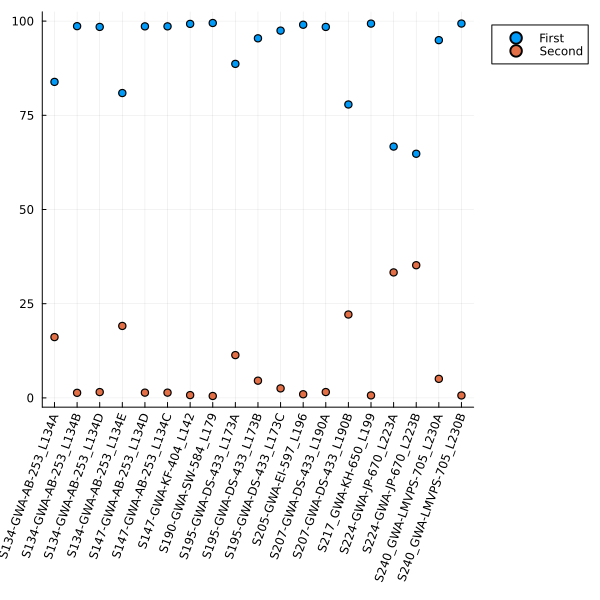

In [14]:
scatter(dfc.First_median, xticks = (1:length(xnames), xnames), xrotation = 70, size = (600, 600), label = "First", legend = :outertopright)

scatter!(dfc.Second_median, label = "Second")

In [15]:
#check if ThawN made an effect on strandedness
dfct = dfc[!, [:ThawN, :First_median, :Second_median]]
sort(dfct, :First_median)
#sort(dfct, :Second_median)

,ThawN,First_median,Second_median
,Int64,Float64,Float64
1,5,64.79,35.21
2,1,66.7,33.3
3,3,77.87,22.13
4,2,80.905,19.095
5,1,83.865,16.135
6,1,88.645,11.355
7,2,94.945,5.055
8,3,95.43,4.57
9,4,97.475,2.525


It seems ThawN 2 or 3 improved the strandedness.

In [16]:
#scatter(dfc.ThawN, dfc.First_median)
#scatter!(dfc.ThawN, dfc.Second_median)